<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Worksheet (12)</h1>
<h2 style="color:#800080;text-align:center;">Machine Learning Algorithm: RandomForest</h2>

<h3 b> Introduction </h3>

In the following practical worksheet, you will learn how to build a RandomForest Classifier model. If you have any questions please ask for assistance during the session and you can also email me if you have any further questions <u> alaa.mohasseb@port.ac.uk</u>.

<u>Dataset</u>

In this practical exercise, we will be using the Social Network Ad dataset, the dataset has 400 instances and the following attributes: User ID, Gender, Age, Estimated Salary and Purchased. The first Four attributes which are User ID, Gender, Age, and Estimated Salary are predictor attributes and the last attribute which is Purchased is the target attribute. https://www.kaggle.com/rakeshrau/social-network-ads

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek11), load the NumPy, pandas and matplotlib libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook

<u>Read External Data</u> (Social Network Ad Dataset)
<ul>
<li>Download the dataset from your moodle page.</li>
<li>Upload the dataset to your Jupyter dashboard.</li>
<li>To read an external data (csv file) use the following command:</li>
</ul>

In [21]:
SNA = pd.read_csv("Social_Network_Ads.csv")

In [22]:
SNA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<u>Data understanding and Exploration</u>

To understand the dataset, analysis should be done and some information needs to be explored such as:

- The Attributes
- Data Shape
- Data Description
- Data Information
- Data Type
- Data Visualization

In [23]:
SNA.keys() #Print the attributes

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
SNA.describe() #Data description

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [25]:
SNA.dtypes #Data Type

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [26]:
SNA['Purchased'].value_counts() #Print  Number of instances in the target (class) attribute

0    257
1    143
Name: Purchased, dtype: int64

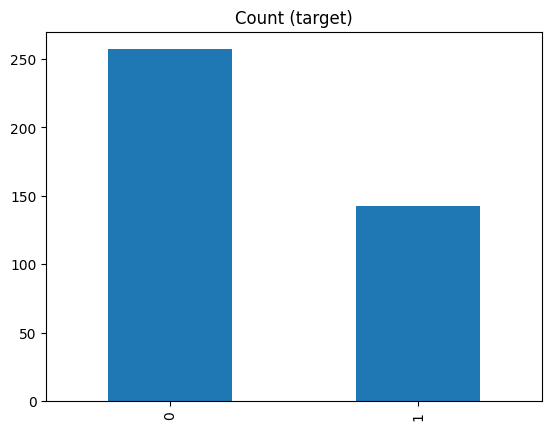

In [27]:
#Visualize the number of instances in the target (class) attributes
SNA['Purchased'].value_counts().plot(kind='bar', title='Count (target)');

<u>Encoding the categorical data</u>

The <code>LabelEncoder</code> is used to convert any categorical data to numerical labels.

The <code>LabelEncoder</code> will be used to convert <u>Gender</u> to the following values <i>Female=0</i>, <i>Male=1</i>


In [28]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
SNA['Gender'] = LE.fit_transform(SNA['Gender'])

In [29]:
#To view the new dataset after encoding the categorical data
SNA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<u>Define the predictor and target attribute</u>

We will use all the attributes as our Predictor attributes which we call <code>"x"</code> and Purchased is the target attribute which we call <code>"y"</code>.

<i>The following means select all the predictor attributes (x) except the target (class) attributes (y)  which is always represented as (-1). </i>

In [30]:
x = SNA.iloc[:,:-1].values    # predictor attribute
y = SNA.iloc[:,-1].values        # target attribute

In [31]:
#To view the value of x
SNA.iloc[:,:-1].values    # predictor attribute

array([[15624510,        1,       19,    19000],
       [15810944,        1,       35,    20000],
       [15668575,        0,       26,    43000],
       ...,
       [15654296,        0,       50,    20000],
       [15755018,        1,       36,    33000],
       [15594041,        0,       49,    36000]])

In [32]:
#To view the value of y
SNA.iloc[:,-1].values        # target attribute

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

<u>Train/Test the data </u>

The dataset will be split into a test set and a train set. A 75% dataset is split for training and the remaining 25% for tests.

<b>Note:</b> <code>random_state=0</code>


- If you don't mention the random_state in the code, then whenever you execute your code a new random value is generated and the train and test datasets would have different values each time.

- However, if you use a particular value for random_state(random_state = 0 or any other value) everytime the result will be same,i.e, same values in train and test datasets.

In [33]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=0)

<u>Feature Scaling</u>

Since some attributes in the dataset (age and estimated salary) contains information in Numeric value, and some value is very high and some are very low, this will cause some issues when building the model, to solve that problem all values must be set on the same scale. There are two methods to solve that problem:

- Normalization
- Standard Scaler

In this pracatical Standard Scaler will be used

In [34]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

<u>Build the Machine learning Model</u>

RF Classifier will be imporetd using Scikit Learn Library.

In [35]:
# import the random forest classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

<u>Initialize the RF model</u>

In this step, RF model will be initialized. <code>n_estimators = 10</code>,  criterion =<code>entropy</code>, <code>random_state= 0</code> will be used.

- n_estimators: The number of trees in the forest, since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process
- Criterion: is the function to measure the quality of a split. Could be “gini”, “entropy” or “log_loss”
- Random state: controls the randomness of the estimator. The features are always randomly permuted at each split.

In [1]:
#initialize the RF model using Entropy (Information Gain)
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

NameError: name 'RandomForestClassifier' is not defined

<u>Fitting the RF Model</u>

In this step, the training data will be fitted into the model x_train, y_train is the training data.

In [37]:
#fit the Naive Bayes Model
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<u>Model Predicttion</u>

In [38]:
#result
y_pred=RF.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

<u>Confusion Matrix</u>

In this step, confusion metric will be used to display the result, to do that confusion matrix will be imported from sklearn.metrics then two parameters will be passed first is the <code> y_test </code> which is the actual test set result and second is <code>y_pred</code> which is the predicted result.

In [39]:
# print the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]])

<u>Print the Confusion Matrix using a heatmap visualization</u>

<Axes: >

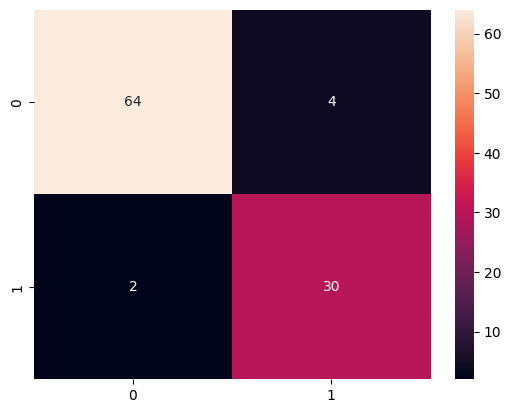

In [40]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<u>Print confusion Matrix as DataFrame</u>

In [41]:
from sklearn.metrics import confusion_matrix
unique_label = np.unique([y_test, y_pred])
cm=confusion_matrix(y_test, y_pred, labels=unique_label )
pd.DataFrame(cm,  columns=unique_label)

,0,1
0,64,4
1,2,30


<u>Print the full results report</u>

In this report:

- The precision, recall, f1-score and support will be printed
- The columns will show the instances predicted for each label,
- The rows will show the actual number of instances for each label.

The <u>support</u> is the number of occurrences of each class in <code>y_true</code>.

In [42]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[64  4]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



<u> More detailed results report</u>

The following report will display more detailed and more metrics

In [43]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[64  4]
 [ 2 30]]
Mean Absolute Error: 0.06
Mean Squared Error: 0.06
Root Mean Squared Error: 0.2449489742783178
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100

Accuracy: 0.94


<u> Accuracy Score</u>

In this step, the accuracy is calculated  based on the actual test results and the predicted test results.

In [44]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac*100

94.0

OR

In [45]:
import sklearn.metrics as metrics
ac=accuracy_score(y_test, y_pred)
ac*100

94.0